<center>
# Pandas exercise
</center>
**Due** : 2018-03-20 20:29:59

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

> **Warning**

> * <font color='red'> Do not use other packages except for `numpy`, `pandas`, `matplotlib` </font>

> * <font color='red'> Do not modify other code except for `YOUR CODE HERE` </font>

## Problem 1 : Word Counting

<center>
<img src="https://github.com/tvararu/the-last-question/raw/master/screenshot.png" alt="Drawing" style="width: 700px;"/>
</center>

 아이작 아시모프(Issac Asimov)의 단편 소설 최후의 질문(The last question)은 컴퓨터에게 인류 최후의 질문을 묻는 과정을 그린 소설이다. 이 소설을 불러와 각 단어 별로 몇 번 나왔는지 개수를 카운트하여 pandas.Series 형태로 리턴하는 함수를 작성하시오. 
 
그리고 이 함수를 이용하여 가장 자주 나온 단어 상위 10개만 골라 matplotlib를 통해 bar 그래프를 그리시오.

** Load the last question ** and parsing using [Regular Expression](https://en.wikipedia.org/wiki/Regular_expression).

In [8]:
import requests, re
response = requests.get("http://www.multivax.com/last_question.html")
story = response.text.split('\r\n<br>\r\n')[1]
story = re.sub("\r|\n|<.*>|--|", '', story)
print(story[:2000])
# Delete special characters
story = re.sub("'s|\'|\"|\.|\,|\?|\:|;|\(|\)|\!", ' ', story)
story = re.sub("\s *", ' ', story)

The last question was asked for the first time half in jest on May 21     2061 at a time when humanity first stepped into the light The question   came about as a result of a five dollar bet over highballs and it happened   this way   


In [4]:
word_list = story.lower().split(' ')

In [5]:
def word_count(word_list):
    count_array=pd.Series(word_list).value_counts()
    return count_array

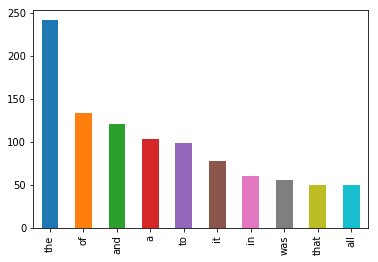

In [6]:
word_count(word_list)[:10].plot.bar()
plt.show()

## Problem 2

"vix_data.xlsx"는 S&P500 지수(SPX)와 VIX 지수 10년치 데이터이다. 

<img src="https://preview.ibb.co/cjpe2x/1.png" alt="1" border="0">

(1) 결측지를 제거하고 S&P500의 로그 수익률과 VIX지수 변화량을 구하는 함수를 작성하시오. 그리고 scatter plot하시오.

(2) 위의 결과에서 `pd.resample`을 이용하여 매월 월간 평균값을 구하고 마찬가지로 scatter plot하시오.

** log return**
$$
    r_t = \log{P_t} - \log{P_{t-1}}
$$

In [7]:
#결측값이란 비어 있는 값. 즉 설묹사에서 대답 안한 것과 같은.
df = pd.read_excel("vix_data.xlsx").set_index(['DATE']).dropna()

In [8]:
def calc_return(price):
    ret=np.log(price)-np.log(price.shift(1))
    return ret

def calc_delta(price):
    delta=price-price.shift(1)
    return delta

In [9]:
df['SnP500 ret'] = calc_return(df['SnP500'])
df['VIX delta'] = calc_delta(df['VIX'])
df=df.dropna()
df
#왜 실행할때마다 DATE가 하나씩 날라가지?

,SnP500,VIX,SnP500 ret,VIX delta
DATE,,,,
2006-05-08,1324.66,12.00,-0.000830,0.38
2006-05-09,1325.14,11.99,0.000362,-0.01
2006-05-10,1322.85,11.78,-0.001730,-0.21
2006-05-11,1305.92,12.49,-0.012881,0.71
2006-05-12,1291.24,14.19,-0.011305,1.70
2006-05-15,1294.50,13.57,0.002522,-0.62
2006-05-16,1292.08,13.35,-0.001871,-0.22
2006-05-17,1270.32,16.26,-0.016984,2.91
2006-05-18,1261.81,16.99,-0.006722,0.73


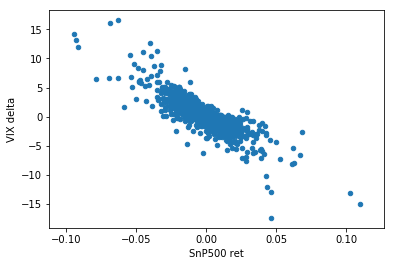

In [10]:
df.plot.scatter('SnP500 ret', 'VIX delta')
plt.show()

In [11]:
def calc_monthly_mean(df):
    df_out=df.resample('1M').mean()
    return df_out

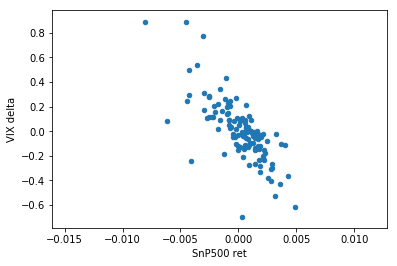

In [12]:
df_out = calc_monthly_mean(df[['SnP500 ret', 'VIX delta']])
df_out.plot.scatter('SnP500 ret', 'VIX delta')
plt.show()

(3) VIX 지수와 S&P500 지수의 역사적 변동성 관계를 테스트하려 한다. S&P500 지수의 20거래일 역사적 변동성을 구하고 (로그 수익률의 annualized 표준편차) 이를 VIX 지수와 scatter plot하시오. 

> **Hint** : pd.rolling 사용, annualized 표준편차는 기존 표준편차에 $\sqrt{252}$ 곱하여 구한다.

In [14]:
def calc_hist_vol(ret, window=20):
    vol_series=ret.rolling(20).std()*np.sqrt(252)
    return vol_series

In [15]:
vol = calc_hist_vol(df['SnP500 ret'])
vol.name = 'SnP500 hist vol'
vix = df['VIX']/100

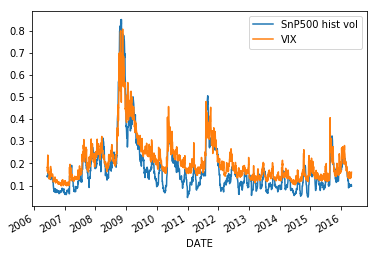

In [16]:
pd.concat([vol, vix], axis=1).dropna().plot()
plt.show()